# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
import warnings; warnings.simplefilter('ignore')

Load feature names.

In [24]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [25]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

Fraction of the total variance explained by the first k principal components:

k: 1 - 16.4%
k: 2 - 29.7%
k: 3 - 39.9%
k: 4 - 47.0%
k: 5 - 50.8%
k: 6 - 54.5%
k: 7 - 57.6%
k: 8 - 60.4%
k: 9 - 63.0%
k: 10 - 65.2%
k: 11 - 67.3%
k: 12 - 69.1%
k: 13 - 70.9%
k: 14 - 72.6%
k: 15 - 74.1%
k: 16 - 75.6%
k: 17 - 77.0%
k: 18 - 78.4%
k: 19 - 79.8%
k: 20 - 80.9%
k: 21 - 82.0%
k: 22 - 83.0%
k: 23 - 84.1%
k: 24 - 85.1%
k: 25 - 86.0%
k: 26 - 86.8%
k: 27 - 87.6%
k: 28 - 88.4%
k: 29 - 89.2%
k: 30 - 89.9%
k: 31 - 90.5%
k: 32 - 91.1%
k: 33 - 91.7%
k: 34 - 92.2%
k: 35 - 92.7%
k: 36 - 93.2%
k: 37 - 93.7%
k: 38 - 94.2%
k: 39 - 94.7%
k: 40 - 95.1%
k: 41 - 95.5%
k: 42 - 95.9%
k: 43 - 96.3%
k: 44 - 96.6%
k: 45 - 97.0%
k: 46 - 97.3%
k: 47 - 97.5%
k: 48 - 97.8%
k: 49 - 98.0%
k: 50 - 98.2%


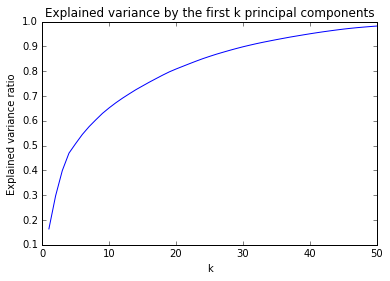

In [26]:

def P1():
### STUDENT START ###
    pca = PCA(n_components=50)
    pca.fit(train_data)
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    print "Fraction of the total variance explained by the first k principal components:\n"
    for k in np.arange(1,51):
        print "k: {k} - {exp_var}%".format(k=k,exp_var=round(explained_variance_ratio[k-1],3)*100)
    plt.plot(np.arange(1,51),explained_variance_ratio)
    plt.ylabel('Explained variance ratio') 
    plt.xlabel('k')
    plt.title('Explained variance by the first k principal components')  
    plt.show() 


### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

(3198, 2) (3802, 2)


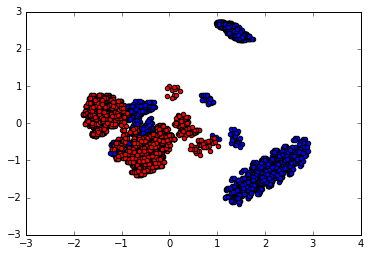

In [27]:
def P2():
### STUDENT START ###
    p2_pca = PCA(n_components=2)
    data = p2_pca.fit_transform(train_data)
    pos, neg = extractData(data,train_labels)
    print pos.shape,neg.shape
    plt.scatter(pos[:,0],pos[:,1],c='#0000FF')
    plt.scatter(neg[:,0],neg[:,1],c='#FF0000')
    
def extractData(rawData,rawLabels):
    p=1
    n=0
    pos_boolean = np.equal(rawLabels,p)
    neg_boolean = np.equal(rawLabels,n)
    return rawData[pos_boolean,:],rawData[neg_boolean,:]
    
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.


k = 1



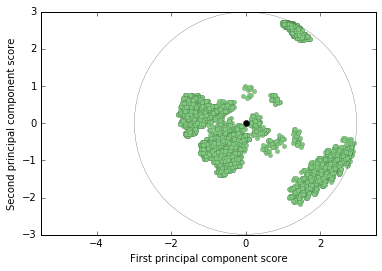


k = 2



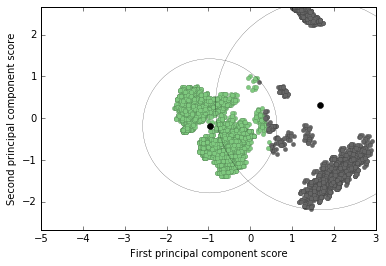


k = 3



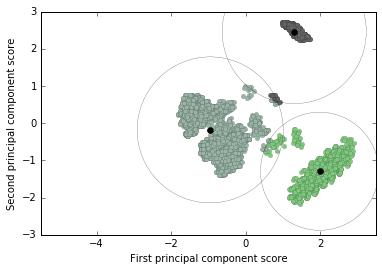


k = 4



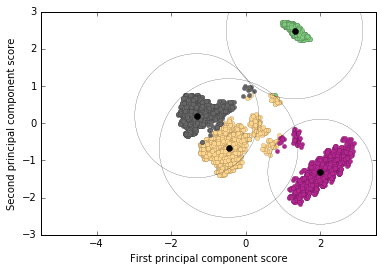


k = 5



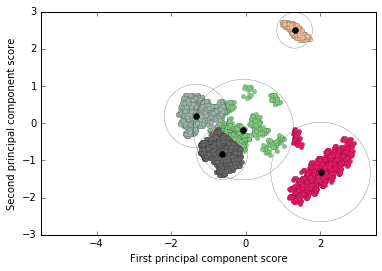


k = 6



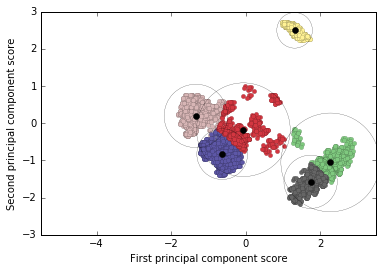


k = 7



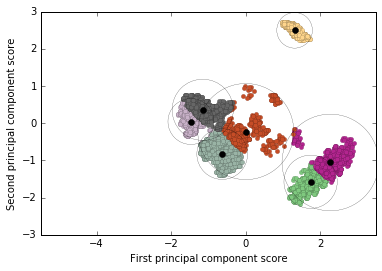


k = 8



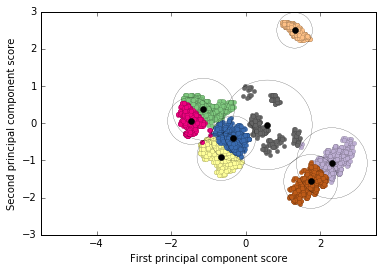


k = 9



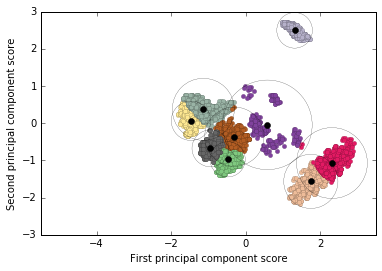


k = 10



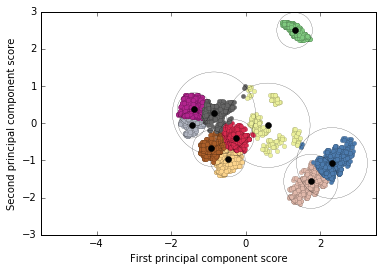


k = 11



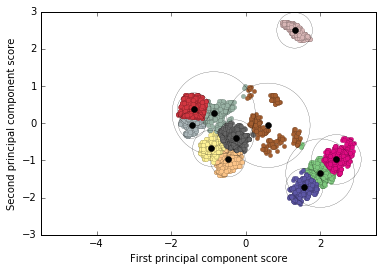


k = 12



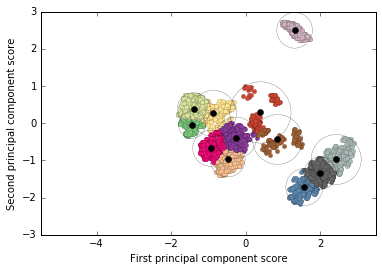


k = 13



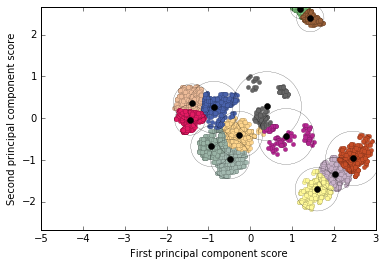


k = 14



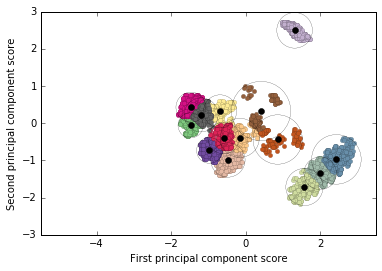


k = 15



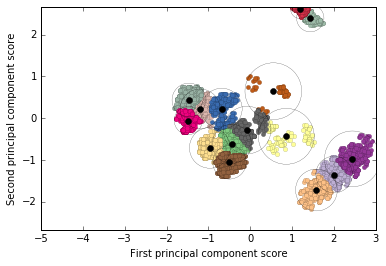


k = 16



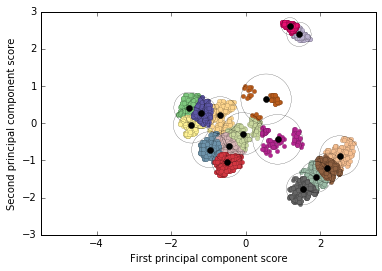

In [28]:
def P3():
### STUDENT START ###
    def draw_k_cluster(k_cluster):
        # project training data to two dimensions
        pca2 = PCA(n_components=2).fit_transform(train_data)
        # add K-means
        kmean = KMeans(n_clusters=k_cluster)
        kmean_fit = kmean.fit(pca2)
        # extract cluster center
        cluster_center = kmean_fit.cluster_centers_
        # extract distances from the center
        distance = kmean_fit.transform(pca2)
        max_distances = np.max(distance,axis=1)
        center_pca1,center_pca2 = zip(*cluster_center)
        # draw scatter plot of the principal component scores
        print '\nk = {k_cluster}\n'.format(k_cluster=k_cluster)
        # start a new figure
        plt.figure()
        # be able to add circles to it
        fig = plt.gcf()
        ax = fig.gca()
        plot_n = 1
        # set a qualitative color scheme to accentuate the differences between the clusters
        colors = plt.cm.Accent(np.linspace(1e-8,1,k_cluster))
        for k,center in enumerate(cluster_center):
            # extract those indices that belong to the kth cluster
            cluster_index = np.where(kmean.labels_==k)
            # get PCA coordinates of the kth cluster
            pca1_coord,pca2_coord = zip(*pca2[cluster_index])
            # get maximum distance (radius) of the kth cluster
            max_distance = np.max(distance[cluster_index][:,k])
            plt.scatter(pca1_coord,pca2_coord,facecolor=colors[k,:],linewidth=0.1)
            circle = plt.Circle(center, max_distance, color='black',fill=False,lw=0.2)
            ax.add_patch(circle)
        # set aspect ratio to 1:1 to plot circles instead of ellipses    
        plt.axes().set_aspect('equal', 'datalim')
        # add cluster centers to the plot
        plt.plot(center_pca1,center_pca2,'o',color='black')
        # set axis limits
        plt.axis([-5,3,-3,3])
        plt.xlabel("First principal component score")
        plt.ylabel("Second principal component score")
        plt.show()
    # plot the clusters
    [draw_k_cluster(k) for k in np.arange(1,17)]

### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

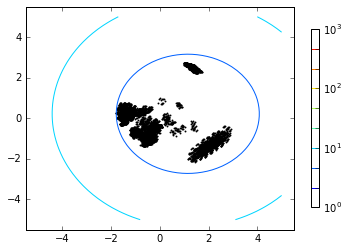

1 spherical


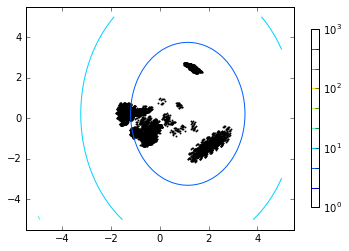

1 diag


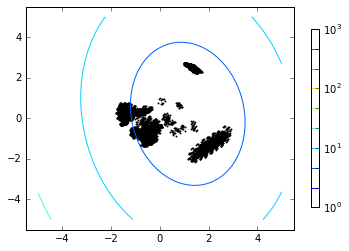

1 tied


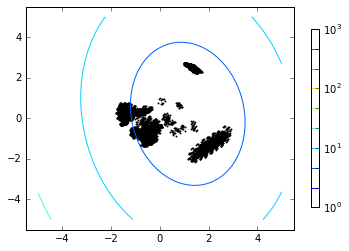

1 full


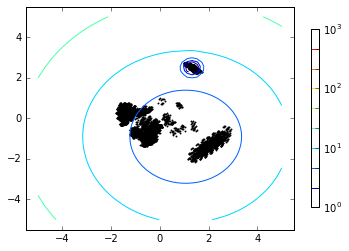

2 spherical


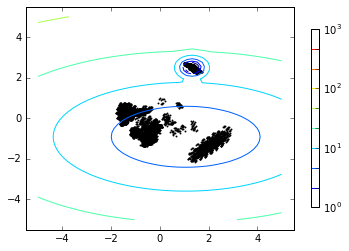

2 diag


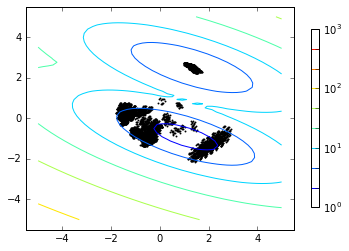

2 tied


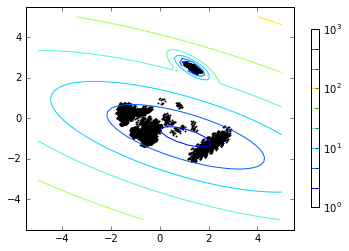

2 full


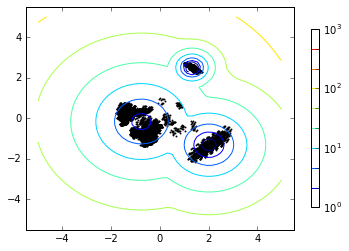

3 spherical


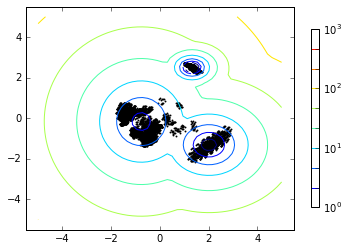

3 diag


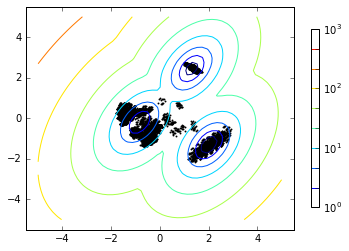

3 tied


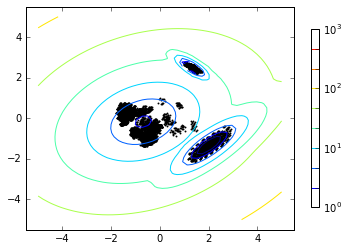

3 full


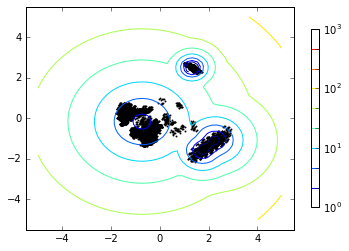

4 spherical


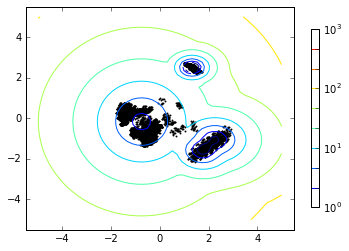

4 diag


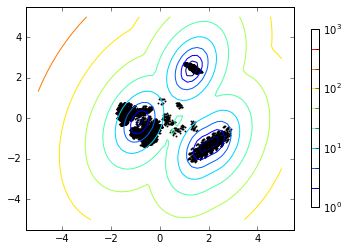

4 tied


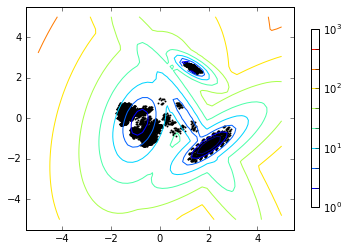

4 full


In [29]:
def P4():
### STUDENT START ###
    p4_pca = PCA(n_components=2)
    tr_data = p4_pca.fit_transform(train_data)
    pos,neg = extractData(tr_data,train_labels) 
    for n in range(1,5):
        for cov_matrix in ['spherical', 'diag', 'tied', 'full']:
            gmm_clf = GMM(n_components=n,covariance_type=cov_matrix)
            gmm_clf.fit(pos)
    
            x = np.linspace(-5.0, 5.0)
            y = np.linspace(-5.0, 5.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm_clf.score_samples(XX)[0]
            Z = Z.reshape(X.shape)
    
    
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(tr_data[:, 0], tr_data[:, 1], .8)
            plt.axis('tight')
            plt.show()
            plt.close()
            print n, cov_matrix

### STUDENT END ###

P4()

  

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

Accuracy: 0.951067615658

Predicted log-likelihood values: warmer colors indicate higher certainty of prediction.


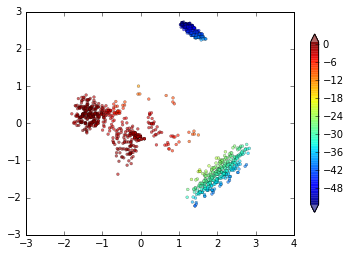

In [30]:
def P5():
### STUDENT START ###
    # project to two dimensions
    pca2 = PCA(n_components=2)
    # transform train and tests sets
    pca2_train = pca2.fit_transform(train_data)
    pca2_test = pca2.transform(test_data)
    # extract positive and negative training data
    pca2_positive = pca2_train[train_labels==1]
    pca2_negative = pca2_train[train_labels==0]
    # fit a GMM to the positive and negative sets
    gmm = GMM(n_components=4, covariance_type='full')
    gmm_pos = gmm.fit(pca2_positive)
    # GMM likelihood is the normal probability, as the logarithm is a homomorphic transformation, we can compare the logs
    # to decide which probability is higher
    pos_loglik = gmm_pos.score(pca2_test)
    gmm_neg = gmm.fit(pca2_negative)
    neg_loglik = gmm_pos.score(pca2_test)
    # Predicted label positive (1) if positive is greater than negative, negative (0) otherwise
    pred_labels = pos_loglik>neg_loglik
    # calculate accuracy
    accuracy = float(np.sum(test_labels==pred_labels))/len(test_labels)
    print 'Accuracy: {acc}'.format(acc=accuracy)
    # plot where the model is the most certain
    pred_loglik = pos_loglik if pred_labels is 1 else neg_loglik
    SC = plt.scatter(pca2_test[:,0],pca2_test[:,1],c=pred_loglik,marker="o",alpha=.6,s=8,lw=0.3)
    CB = plt.colorbar(SC, shrink=0.8, extend='both')
    print '\nPredicted log-likelihood values: warmer colors indicate higher certainty of prediction.'
    plt.show()
### STUDENT END ### np.exp(gmm_pos.score(pca2_test))

P5()

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [31]:
def P6():
### STUDENT START ###
    print 'Benchamrk P5(): 40 parameters - 0.95 accuracy\n'

    # --------------------------------- Define a GMM fitter ------------------- #

    class GmmFitter():
        '''Fits a GMM, returns accuracy and number of model parameters'''
    
        def __init__(self,n_pca,n_gmm,cov_type):
            '''Initialize a GMM fitter instance'''
            self.n_pca = n_pca
            self.n_gmm = n_gmm
            self.cov_type = cov_type
            if cov_type is 'spherical':
                self.n_cov_pars = 1
            elif cov_type is 'diag':
                self.n_cov_pars = self.n_pca
            elif self.cov_type is 'tied':
                self.n_cov_pars = 0.5*self.n_pca*(self.n_pca+1)
            elif self.cov_type is 'full':
                self.n_cov_pars = 0.5*self.n_pca*(self.n_pca+1)
            else:
                print 'Covariance matrix has to be either "spherical", "diag", "tied" or "full".'
            
        @property
        def n_pars(self):
            '''Number of parameters in the model'''
            if self.cov_type is not 'tied':
                return ((self.n_pca+self.n_cov_pars)*self.n_gmm)*2
            else:
                # one covariance matrix estimated for all mixture components
                return (self.n_pca*self.n_gmm+self.n_cov_pars)*2
            
        def fit(self,train_data,test_data,train_labels,test_labels):
            '''Fit GMM and return its accuracy'''
            # project to two dimensions
            pca = PCA(n_components=self.n_pca)
            # transform train and tests sets
            pca_train = pca.fit_transform(train_data)
            pca_test = pca.transform(test_data)
            #fit a GMM 
            gmm = GMM(n_components=self.n_gmm, covariance_type=self.cov_type)
            # extract positive and negative training data
            pca_positive = pca_train[train_labels==1]
            pca_negative = pca_train[train_labels==0]
            gmm_pos = gmm.fit(pca_positive)
            pos_loglik = gmm_pos.score(pca_test)
            gmm_neg = gmm.fit(pca_negative)
            neg_loglik = gmm_pos.score(pca_test)
            # Predicted label positive (1) if positive is greater than negative, negative (0) otherwise
            pred_labels = pos_loglik>neg_loglik
            # calculate accuracy
            accuracy = float(np.sum(test_labels==pred_labels))/len(test_labels)
            return accuracy

    # ------------------- Model selection --------------------------- #
    # define parameter space
    cov_types = ['spherical','diag','tied','full']
    pcas = np.arange(1,25) # spherical cov, 1 GMM, 24 PCAs give 50 parameters
    gmms = np.arange(1,25) # tied cov, 24 GMM, 1 PCA give 50 parameters
    results = {} # create empty dictionary for saving the results in
    # loop over the parameter space
    for cov_type in cov_types:
        for n_pca in pcas:
            for n_gmm in gmms:
                # instantiate a GmmFitter object with the actual parameters
                gmm = GmmFitter(n_pca,n_gmm,cov_type) 
                if gmm.n_pars <= 50:
                    # save parameters as a string as a dictionary key and accuracy as the dictionary value
                    acc = gmm.fit(train_data,test_data,train_labels,test_labels)
                    gmm_text = str(n_pca)+","+str(n_gmm)+","+cov_type+","+str(gmm.n_pars)
                    results[gmm_text] = acc
    # ------------------------- Print results ------------------------ #
    first_line = True 
    template = '| {0:4} |   {1:3} |   {2:4}|   {3:10}  | {4:10} ||{5:8}|'
    # sort the dictionary by accuracies (dictionary values) and save their rank
    for rank,item in enumerate(sorted(results, key=results.get, reverse=True)):
        # print a header before the first line
        if first_line is True:
            print template.format('Rank','PCA','GMM ','Covariance','Parameters','Accuracy')
            print '-' * 63
            pca,gmm,cov,par = item.split(",")
            print template.format(rank+1,pca,gmm,cov,int(float(par)),round(results[item],3))  
            first_line  = False
        # after the first line print the results    
        else:
            pca,gmm,cov,par = item.split(",")
            print template.format(rank+1,pca,gmm,cov,int(float(par)),round(results[item],3))    

### STUDENT END ###

P6()

Benchamrk P5(): 40 parameters - 0.95 accuracy

| Rank |   PCA |   GMM |   Covariance  | Parameters ||Accuracy|
---------------------------------------------------------------
|    1 |   7   |   3   |   spherical   |         48 ||   0.973|
|    2 |   4   |   3   |   tied        |         44 ||   0.968|
|    3 |   6   |   3   |   spherical   |         42 ||   0.968|
|    4 |   5   |   4   |   spherical   |         48 ||   0.968|
|    5 |   5   |   3   |   spherical   |         36 ||   0.966|
|    6 |   3   |   3   |   tied        |         30 ||   0.964|
|    7 |   3   |   6   |   spherical   |         48 ||   0.961|
|    8 |   5   |   2   |   tied        |         50 ||    0.96|
|    9 |   3   |   4   |   spherical   |         32 ||   0.959|
|   10 |   4   |   4   |   spherical   |         40 ||   0.957|
|   11 |   3   |   5   |   spherical   |         40 ||   0.955|
|   12 |   4   |   5   |   spherical   |         50 ||   0.954|
|   13 |   2   |   5   |   full        |         50 ||   